__Content__

- [Preparation](#preparation)
- [Objectives](#objectives)

- [Review](#review)

- [Regularization Techniques](#regularization_techniques)

- [Questions](#questions)

- [Appendix](#appendix)

## Objectives 
<a name="objectives"></a>

- Understand what is regularization

- Understand the effect of hyper-parameter $\lambda$ in Ridge and Lasso.

- Understand the similarities and differences between Lasso-Ridge-Linear models.

- Apply Lasso and Ridge with sklearn and understand the parameters.


### Review
<a name="review"></a>



[__Overfitting - Underfitting__](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

<img src="underfitting_overfitting.png" alt="Bias-Variance" style="width: 500px;"/>

[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<img src="bias_variance_trade_off.png" alt="Bias-Variance" style="width: 400px;"/>



__Linear Model__


$$ Y = \beta_{0} + \beta_{1}X_1 + \beta_{2}X_{2} + \cdots + \beta_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $\beta_{i}$ 
 
 - Use linear algebra or gradient descent to find parameters to minimize:
 
 $$ J(\beta) = \sum\limits_{i=0}^{n} (y_{i} - \beta_{0} - \beta_{1}X_{i1} - \beta_{2}X_{i2} - \cdots - \beta_{p}X_{ip})^{2} $$

### Regularization Techniques

<a name="regularization_techniques"></a>


- Why?

    - Reduces complexity
    
    - Reduce the chance of ovefitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    
    - Help to deal with colinearity



#### Ridge regularization

Instead of minimizing $J(\beta)$ (least squares method), we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p} \beta_{i}^{2} $$

#### Lasso regularization

Instead of minimizing $J(\beta)$, we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p}| \beta_{i} | $$


In [9]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [10]:
# load data 
df = pd.read_csv('../data/Credit.csv', index_col = 0)

In [11]:
# let's see the head of the dataset
display(HTML(df.head().to_html()))
df.shape

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


(400, 11)

In [24]:
## For the purpose of simplicity let's ignore categorical variables
df2 = df.select_dtypes(exclude='object').loc[:]
df2.drop(columns = 'Balance', inplace = True)

df2.head()

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


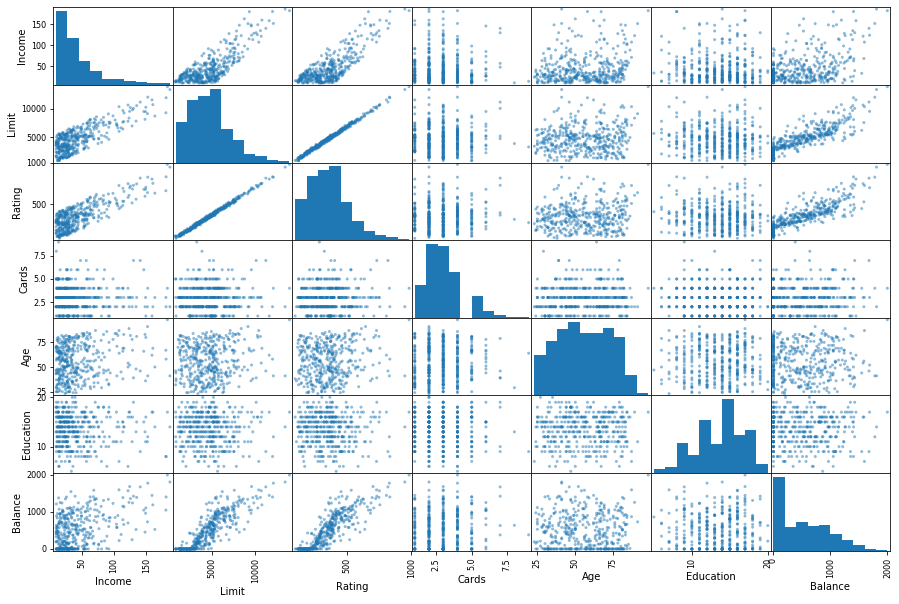

In [17]:
# Scatter_matrix plots are useful tool to see the relationship between columns.
# Note that categorical values omitted automatically
scatter_matrix(df2, figsize = (15,10))
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [26]:
X = df2.values
y = df.Balance.values.reshape(-1,1)

In [35]:
df2.head(2)

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15


In [64]:
lr = LinearRegression()
lr.fit(Xp, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.coef_

array([[-2.08586062e-02,  4.47727024e+01, -1.57441832e+00,
         1.42928265e+01,  4.53936383e+01, -1.10160866e+01,
        -1.60179398e+02,  3.46215001e-01,  1.71004601e-02,
        -5.24547880e-01,  2.00250415e+00, -1.06156175e-01,
        -2.55682230e+00,  2.10466490e-03, -5.88367294e-02,
         7.52905736e-01, -1.49661560e-02,  1.78073788e-01,
         4.61364944e-01, -1.13093679e+01,  2.08542944e-01,
        -2.34769543e+00,  4.72127748e+01, -1.53221958e+00,
         1.16412916e+01,  3.55977830e-02,  2.17154536e+00,
         1.18179879e+01,  9.05157092e-04, -3.97774505e-05,
        -4.40310986e-04,  5.34798885e-03,  9.32135320e-04,
        -1.24137989e-02, -2.31932761e-05,  7.15537833e-04,
        -3.42015975e-03, -3.16779506e-04, -1.73767148e-03,
        -5.11051592e-03,  4.91493130e-02,  4.52406143e-03,
         3.19433816e-02, -2.56939723e-01, -5.54499650e-04,
        -1.64978418e-01,  4.40860988e-05, -4.24776040e-03,
         5.47513020e-02,  1.82133628e-06, -7.65940343e-0

array([[1.00e+00, 7.00e+04, 3.00e+03, 5.00e+02, 1.00e+00, 5.00e+01,
        1.50e+01, 4.90e+09, 2.10e+08, 3.50e+07, 7.00e+04, 3.50e+06,
        1.05e+06, 9.00e+06, 1.50e+06, 3.00e+03, 1.50e+05, 4.50e+04,
        2.50e+05, 5.00e+02, 2.50e+04, 7.50e+03, 1.00e+00, 5.00e+01,
        1.50e+01, 2.50e+03, 7.50e+02, 2.25e+02]])

In [66]:
lr.predict(poly.transform([[70000, 3000, 500, 1, 50, 15]]))

array([[3.0981781e+11]])

In [73]:


print('Shape of the dataset is:', X.shape)


## Create higher order terms
poly = PolynomialFeatures(degree=5,interaction_only= False )
Xp = poly.fit_transform(X)

print('After adding higher order terms: ', Xp.shape)

Shape of the dataset is: (400, 6)
After adding higher order terms:  (400, 462)


In [67]:
%run -i 'supplement.py'

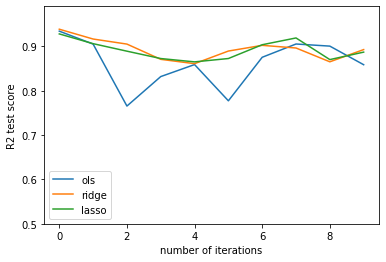

In [115]:
trained_models = model_experiment(num_iter=10, alpha = 10,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 3)

In [79]:
df2.head()

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


In [80]:
## from df2 create a dataset with degrees 3
## fit a ridge and lasso algorithm to this dataset with degree 3 
## polynomial features

In [82]:
## hint:

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

In [ ]:
## normalization and standardization

## 

In [120]:
lr_lasso = Lasso(alpha= 10000, normalize= True, max_iter= 1000)

In [121]:
lr_lasso.fit(df2, y)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lr_lasso.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.])

In [118]:
lr_ridge = Ridge(alpha = 10000, normalize = True, max_iter= 1000)
lr_ridge.fit(df2, y)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [119]:
lr_ridge.coef_

array([[ 6.04597867e-04,  1.71595637e-05,  2.56561809e-04,
         2.89824807e-03,  4.82111053e-06, -1.18491016e-04]])

__Your Turn__

- Try different values for alpha --> report your observations

- Change complexity = 'polynomial' and observe the change in the variance of the models. 

- Report your observations.


In [117]:
# After run model_experiment with complexity == 'polynomial'

lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso
lr_lasso.coef_

# compare them with OLS/Ridge models.


array([   0.        , -229.82416605,  172.71409812,  301.4414402 ,
          0.        ,   -0.        ,   -0.        ,   -1.87631873,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   76.77437073,    0.        ,   15.39261309,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   21.88504961,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

__Effect of Scaling Data__

(array([43., 20., 13., 10.,  5.,  4.,  2.,  0.,  2.,  1.]),
 array([-0.98383431, -0.50391153, -0.02398875,  0.45593403,  0.93585681,
         1.41577959,  1.89570237,  2.37562514,  2.85554792,  3.3354707 ,
         3.81539348]),
 <a list of 10 Patch objects>)

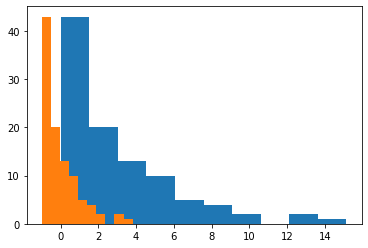

In [74]:
x = np.random.exponential(scale = 3, size = 100)

plt.hist(x)


x_scaled = (x - x.mean())/x.std(ddof = 1)


plt.hist(x_scaled)



#### Effect of $\lambda$ in Lasso and Ridge

<img src="lasso_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<img src="ridge_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<a name='questions'></a>
### Questions



Q. Should I do normalization for Lasso or Ridge?

A. Yes? Why?

Q. When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

Q. How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

Q: How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.

#### Appendix
<a name='appendix'></a>

Here I would like to add some reading material that I found useful while working with the code.


- [pd.get_dummies or OneHotEncoder? - Read second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

- [On dummy variable trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

- Learn.co -- Section-28 Lasso-Ridge

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/) 2.2.2 The Bias-Variance Trade-off and 6.2 Shrinkage Methods




Image Sources in order of appearance: 
- https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205


